In [1]:
import pickle
import numpy as np
from upsetplot import plot, generate_counts, from_memberships, UpSet
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
from itertools import combinations
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
sub_ses = [['SD010','01'],
           ['SD011','01'],
           ['SD012','02'],
           ['SD013','01'],
           ['SD015','01'],
           ['SD017','01'],
           ['SD018','01'],
           ['SD019','01'],
           ['SD021','01'],
           ['SD022','01']
          ]
bands = ['d','th','a','b','g','hg']
ldic = {'d': 'δ',
        'th': 'θ',
        'a': 'α',
        'b': 'β',
        'g': 'γ',
        'hg': 'High γ'}
ndic = {'d': '0',
        'th': '1',
        'a': '2',
        'b': '3',
        'g': '4',
        'hg': '5'}

In [3]:
with open('Figure-S6-S7-S8/non-selective-chs.pkl','rb') as f:
    nonsig_chs = pickle.load(f)

In [4]:
band_chs = {}
for band in bands:
    sp_fname = 'speech_selective_chs_band-%s.pkl'%(band)
    with open(sp_fname,'rb') as f:
        band_chs[band] = pickle.load(f)
        
for band in bands:
    for sub, ses in sub_ses:
        band_chs[band][sub] = band_chs[band][sub][ses]

In [5]:
bands = ['hg','g','b','a','th','d']

In [6]:
d = np.sum([len(band_chs['d'][sub]) for sub in band_chs['d'].keys()])
com_list = []
ch_list = []
for i in range(len(bands)+1):
    if i == 0: 
        chs = [x for sub in nonsig_chs['d'].keys() for x in nonsig_chs['d'][sub] if (x in nonsig_chs['th'][sub]) and \
                                                                                (x in nonsig_chs['a'][sub]) and \
                                                                                (x in nonsig_chs['b'][sub]) and \
                                                                                (x in nonsig_chs['g'][sub]) and \
                                                                                (x in nonsig_chs['hg'][sub])]
        com_list.append([])
        ch_list.append(chs)
    if i == 1: 
        for [a] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub]]
            com_list.append([a])
            ch_list.append(chs)
    if i == 2:
        for [a, b] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub] if (x in band_chs[b][sub])]
            com_list.append([a,b])
            ch_list.append(chs)
    if i == 3:
        for [a, b, c] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub] if (x in band_chs[b][sub]) and \
                                                                                (x in band_chs[c][sub])]
            com_list.append([a,b,c])
            ch_list.append(chs)
    if i == 4:
        for [a, b, c, d] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub] if (x in band_chs[b][sub]) and \
                                                                                (x in band_chs[c][sub]) and \
                                                                                (x in band_chs[d][sub])]
            com_list.append([a,b,c,d])
            ch_list.append(chs)
    if i == 5:
        for [a, b, c, d, e] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub] if (x in band_chs[b][sub]) and \
                                                                                (x in band_chs[c][sub]) and \
                                                                                (x in band_chs[d][sub]) and \
                                                                                (x in band_chs[e][sub])]
            com_list.append([a,b,c,d,e])
            ch_list.append(chs)
    if i == 6: 
        chs = [x for sub in band_chs['d'].keys() for x in band_chs['d'][sub] if (x in band_chs['th'][sub]) and \
                                                                                (x in band_chs['a'][sub]) and \
                                                                                (x in band_chs['b'][sub]) and \
                                                                                (x in band_chs['g'][sub]) and \
                                                                                (x in band_chs['hg'][sub])]
        com_list.append(bands)
        ch_list.append(chs)

In [7]:
example = from_memberships([[ndic[x] for x in com] for com in com_list], data=[len(x) for x in ch_list])
example = example.sort_index()

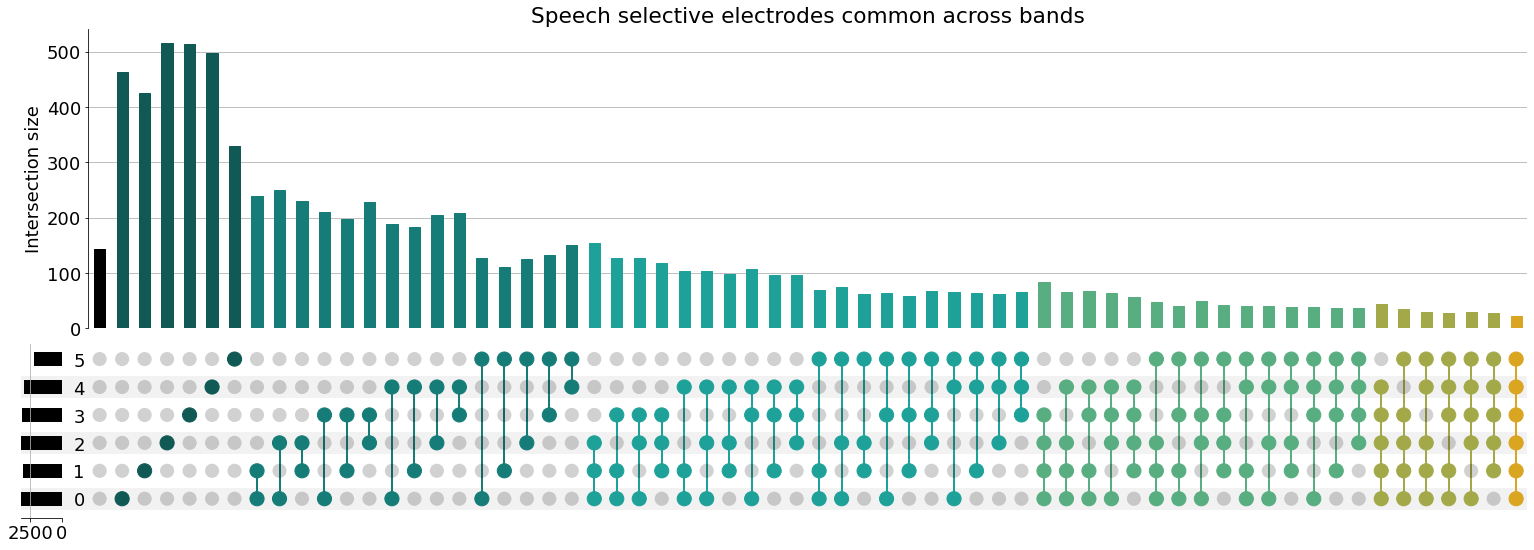

In [8]:
nodes = [0.0, 0.5, 1.0]
colors = ["black", "lightseagreen", "goldenrod"]
cmap2 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))

fig = plt.figure(figsize=(27, 9))
us = UpSet(example, element_size=None, sort_categories_by=None, intersection_plot_elements=10)
us.style_subsets(min_degree=0, max_degree=0, facecolor=cmap2(0.0))
us.style_subsets(min_degree=1, max_degree=1, facecolor=cmap2(0.25))
us.style_subsets(min_degree=2, max_degree=2, facecolor=cmap2(0.35))
us.style_subsets(min_degree=3, max_degree=3, facecolor=cmap2(0.45))
us.style_subsets(min_degree=4, max_degree=4, facecolor=cmap2(0.65))
us.style_subsets(min_degree=5, max_degree=5, facecolor=cmap2(0.85))
us.style_subsets(min_degree=6, max_degree=6, facecolor=cmap2(1.0))

us.plot(fig=fig) #fig=fig, element_size=None, sort_categories_by=None, intersection_plot_elements=10)

plt.title('Speech selective electrodes common across bands')
plt.show()